In [1]:
%matplotlib inline
import numpy as np
from sklearn.datasets import make_blobs, load_iris
from matplotlib import pyplot as plt
from scipy import misc

## 1.1 K-means

In [73]:
def kmeans(X,K,max_iter=1000):
    """
    Perform k-means on the dataset X.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data are given row-wise
    K : int
        Number of clusters
    max_iter : int
        Maximum number of iterations to perform
        
    Returns
    -------
    means : ndarray of shape (K,d)
        the K recovered cluster means given row-wise
    groups : dict (of length K) of lists
        each list gives the indices of points in the cluster
    """
    # initialize the means as randomly selected points in the data
    n = X.shape[0]
    ind = np.random.randint(0, n, K)
    means = X[ind,:]
    
    # initialize the groups. a disctionary is recommended. 
    groups = {i:[] for i in range(K)}
    
    # iterate
    for i in range(max_iter):
        # assign each point to a group
        for j in range(X.shape[0]):
            groups[np.argmin(((means-X[j,:])**2).sum(axis=1))].append(j)
            
        # calculate new means
        new_means = []
        for g in set(groups.keys()):
            inds = groups[g]
            
            new_means.append(list(np.mean(X[inds,:], axis = 0)))
        
        # see if we have converged
        if np.allclose(means,new_means):
            print("Converged after {} iterations!".format(i))
            return np.array(means), groups
        else:
            means = new_means
            groups = {i:[] for i in range(K)}
    print("Failed to converge after {} iterations...".format(max_iter))
            

Converged after 3 iterations!


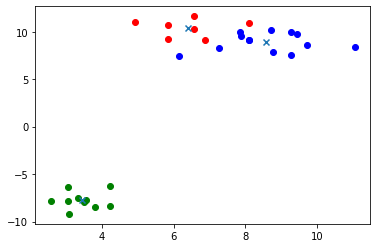

In [74]:
# toy example 
X,y = make_blobs(n_samples=30,n_features=2,centers=3)
means, groups = kmeans(X,3)
colorstring='rgb'
for k in range(3):
    plt.scatter(X[groups[k],0],X[groups[k],1],c=colorstring[k])
plt.scatter(means[:,0],means[:,1],marker="x")
plt.show()

In [75]:
# iris dataset example
iris = load_iris()
X = iris.data
Y = iris.target
means, groups = kmeans(X,3)
conf = np.empty((3,3))
for i in range(3):
    for j in range(3):
        conf[i,j] = (Y[groups[j]]==i).sum()
print("Confusion Matrix")
print(conf)

Converged after 10 iterations!
Confusion Matrix
[[50.  0.  0.]
 [ 0.  3. 47.]
 [ 0. 36. 14.]]


In [76]:
# save data for future use
iris_array = np.empty((X.shape[0],5))
iris_array[:,:-1] = X
iris_array[:,-1] = Y
np.savetxt("irisdata.txt",iris_array, fmt='%.1f')

Original


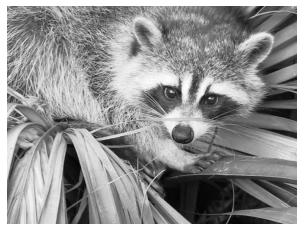

In [77]:
# compression example

# load image
f = misc.face(gray=True)
print("Original")
plt.imshow(f,cmap=plt.cm.Greys_r) 
plt.axis('off')
plt.show()


In [147]:
# A function that quantize and recover the image
def quantize(x, k):
    
    """
    
    Using K-means to compute the center and indcies of each cluster
    Recover the image by assigning each pixel to its corresponding centroid
    Input: image x (n,d), number of cluster k 
    Output: the recoverd image (n,d)
    
    """
    # flatten the input image
    h,d = x.shape
    x_r = x.reshape( h*d, 1)
    
    recover = np.zeros(x_r.shape)
    means, groups = kmeans(x_r, k)
    
    # replace each pixel with its cluster mean
    for c in groups.keys():
        ind = groups[c]
        recover[ind,:] = means[c]
        
    # reshape the recovered image
    recovered = recover.reshape(h, d)
    
    
    return recovered

In [149]:
# quantize and plot
K = [2, 4, 6]
# scale the image"
f_scale = f / 255

I = []

for k in K:
    I.append(quantize(f_scale, k))


Converged after 5 iterations!
Converged after 7 iterations!
Converged after 16 iterations!


k = 2


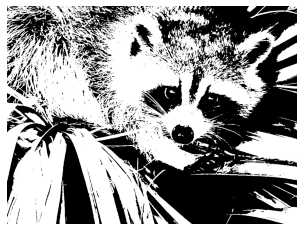

In [175]:
print('k = 2')
plt.imshow(I[0],cmap=plt.cm.Greys_r) 
plt.axis('off')
plt.show()

k = 4


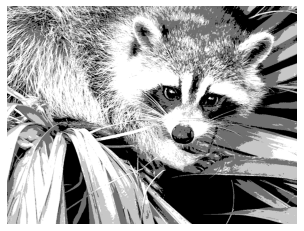

In [176]:
print('k = 4')
plt.imshow(I[1],cmap=plt.cm.Greys_r) 
plt.axis('off')
plt.show()

k = 6


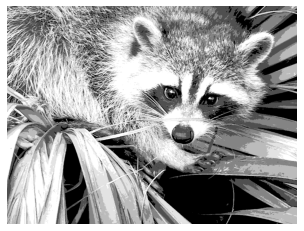

In [177]:
print('k = 6')
plt.imshow(I[2],cmap=plt.cm.Greys_r) 
plt.axis('off')
plt.show()

k = 8
Converged after 30 iterations!


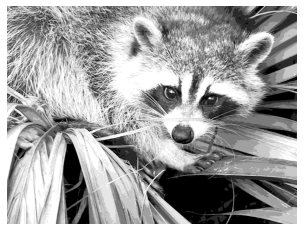

In [179]:
print('k = 8')
img1 = quantize(f_scale, 8)
plt.imshow(img1 ,cmap=plt.cm.Greys_r) 
plt.axis('off')
plt.show()

k = 15
Converged after 25 iterations!


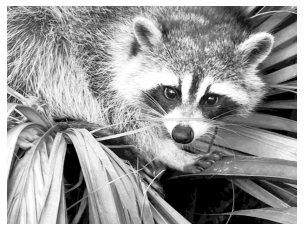

In [183]:
print('k = 15')
img = quantize(f_scale, 15)
plt.imshow(img ,cmap=plt.cm.Greys_r) 
plt.axis('off')
plt.show()

From above we can see that from $k=6$ there is no much difference between the original image and the recovered one. And beyond $k=15$ there is no visually difference between the original image and the recovered one.

## 1.2 K-medians

In [159]:
def kmedians(X,K,max_iter=1000):
    
    """
    Perform k-medians on the dataset X.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data are given row-wise
    K : int
        Number of clusters
    max_iter : int
        Maximum number of iterations to perform
        
    Returns
    -------
    medians : ndarray of shape (K,d)
        the K recovered cluster medians given row-wise
    groups : dict (of length K) of lists
        each list gives the indices of points in the cluster
    """
    
    # initialize the medians as randomly selected points in the data
    n = X.shape[0]
    ind = np.random.randint(0, n, K)
    medians = X[ind,:]
    
    # initialize the groups.
    groups = {i:[] for i in range(K)}
    
    # iterate
    for i in range(max_iter):
        # assign each point to a group
        for j in range(X.shape[0]):
            groups[np.argmin((np.abs(medians-X[j,:])).sum(axis=1))].append(j)
            
        # calculate new means
        new_medians = []
        for g in set(groups.keys()):
            inds = groups[g]
            
            new_medians.append(list(np.median(X[inds,:], axis = 0)))
        
        # see if we have converged
        if np.allclose(medians,new_medians):
            print("Converged after {} iterations!".format(i))
            return np.array(medians), groups
        else:
            medians = new_medians
            groups = {i:[] for i in range(K)}
            
    print("Failed to converge after {} iterations...".format(max_iter))

In [154]:
# define a quantization function for k median
def quantize_kmedian(x, k):
    
    """
    
    Using K-medians to compute the center and indcies of each cluster
    Recover the image by assigning each pixel to its corresponding centroid
    Input: image x (n,d), number of cluster k 
    Output: the recoverd image (n,d)
    
    """
    # flatten the input image
    h,d = x.shape
    x_r = x.reshape( h*d, 1)
    
    recover = np.zeros(x_r.shape)
    medians, groups = kmedians(x_r, k)
    
    # replace each pixel with its cluster mean
    for c in groups.keys():
        ind = groups[c]
        recover[ind,:] = medians[c]
        
    # reshape the recovered image
    recovered = recover.reshape(h, d)
    
    
    return recovered

In [160]:
# run k medians for k = 2
re_image = quantize_kmedian(f, 2)

Converged after 9 iterations!


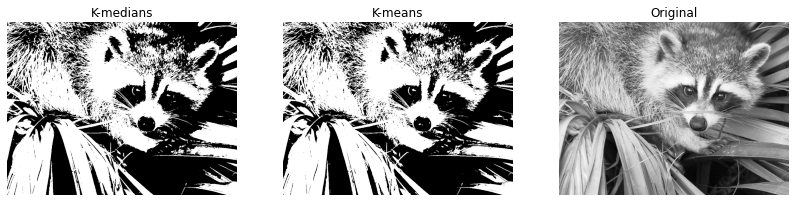

In [174]:
# show the recovered image and compare to the image from k-means
fig, axs = plt.subplots(1,3, figsize = (14,16))
axs[0].imshow(re_image,cmap=plt.cm.Greys_r)
axs[0].set_title('K-medians')
axs[0].axis('off')
axs[1].imshow(I[0],cmap=plt.cm.Greys_r) 
axs[1].set_title('K-means')
axs[1].axis('off')
axs[2].imshow(f,cmap=plt.cm.Greys_r) 
axs[2].set_title('Original')
axs[2].axis('off')
plt.show()

In [181]:
re_image == I[0]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

As we can see the recovered images using k-means and k-meidans are not exactly the same. However, visually they are not significantly different from each other. Although some palces (e.g. area in the head) in the left image, which is produced by K-medians, appears to be slightly darker than the right image, which is produced by K-means. Comparing with the original image, it is hard to say that one is better than another since they are pretty similar.